In [8]:
import pandas as pd

In [9]:
af = pd.read_csv('../year_end_audio_features.csv')

In [10]:
af.columns.tolist()

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'duration_ms',
 'time_signature']

In [14]:
af[af.liveness == af['liveness'].max()] 
#it actually is a live recording so we'll keep this column

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
515,0.404,0.914,7,-3.043,1,0.096,0.0418,0.0,0.981,0.366,91.944,audio_features,5SDxsjvegCAJwfQjFmc4WY,spotify:track:5SDxsjvegCAJwfQjFmc4WY,https://api.spotify.com/v1/tracks/5SDxsjvegCAJ...,https://api.spotify.com/v1/audio-analysis/5SDx...,243333,4


In [16]:
af[af.speechiness == af.speechiness.max()] 
#anything above a 0.66 is considered to be a podcast or some sort of speaking rather than music so this seems right

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
945,0.573,0.495,8,-7.245,0,0.592,0.405,0.0,0.0969,0.255,179.196,audio_features,4MRT0dDbhqFKl67WzhUbSw,spotify:track:4MRT0dDbhqFKl67WzhUbSw,https://api.spotify.com/v1/tracks/4MRT0dDbhqFK...,https://api.spotify.com/v1/audio-analysis/4MRT...,312027,3


In [20]:
# from pandas_profiling import ProfileReport

# profile = ProfileReport(af)
# profile

In [101]:
af[af.loudness == af.loudness.min()] 
#okay so 0 is the loudest and -60 is quietest

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
972,0.213,0.0743,9,-18.071,0,0.0408,0.344,0.000034,0.212,0.145,53.863,audio_features,416MsJxvxSKY96DCmbJIRs,spotify:track:416MsJxvxSKY96DCmbJIRs,https://api.spotify.com/v1/tracks/416MsJxvxSKY...,https://api.spotify.com/v1/audio-analysis/416M...,218507,4


### Basic Radar Chart
tutorial here: https://www.python-graph-gallery.com/390-basic-radar-chart

In [132]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

In [133]:
#set up dataframe for radar chart
radar = af.get(['danceability', 'energy', 'valence', 'tempo', 'loudness'])

In [134]:
# number of variables
categories = list(radar)
N = len(categories)

In [135]:
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=radar.loc[0].values.flatten().tolist()
values += values[:1]
values

[0.599, 0.785, 0.52, 140.046, -4.013, 0.599]

In [136]:
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

TypeError: range() missing 1 required positional argument: 'c'

In [137]:
# y axes need to be somewhat normalized
radar.min(axis=0)
# radar.max(axis=0)

danceability     0.1620
energy           0.0565
valence          0.0386
tempo           53.8630
loudness       -18.0710
dtype: float64

In [138]:
from sklearn.preprocessing import MinMaxScaler
# scales each feature to fit a 0-1 scale
data = (radar.get(['tempo','loudness']))
scaler = MinMaxScaler(clip=False)
print(scaler.fit(data))

MinMaxScaler()


In [139]:
print(scaler.data_max_)

[210.857  -1.19 ]


In [140]:
scaledy = pd.DataFrame(scaler.transform(data).tolist())

In [149]:
rdf = pd.concat([scaledy,radar],axis=1,join='outer').drop(['tempo','loudness'],axis=1).rename({0:'tempo',1:'loudness'},axis=1)

In [151]:
rdf

,tempo,loudness,danceability,energy,valence
0,0.548957,0.832771,0.599,0.785,0.520
1,0.453374,0.793555,0.951,0.600,0.822
2,0.385142,0.709259,0.808,0.970,0.868
3,0.179211,0.485812,0.675,0.479,0.454
4,0.294030,0.721462,0.778,0.824,0.756
...,...,...,...,...,...
1382,0.294049,0.790771,0.638,0.717,0.249
1383,0.275756,0.656892,0.606,0.652,0.476
1384,0.261870,0.797050,0.646,0.781,0.565
1385,0.409111,0.795332,0.650,0.825,0.593


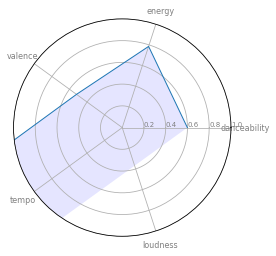

In [79]:
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks( color="grey", size=7)
plt.ylim(0,1)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)

# Show the graph
plt.show()